In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Loading and transforming the data

In [3]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=True)

# Function to show the images

In [4]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Displaying the image dataset

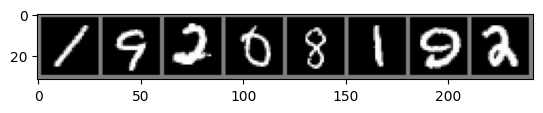

1 9 2 0 8 1 9 2


In [5]:
# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))
# Print labels
print(' '.join(f'{labels[j].item()}' for j in range(8)))


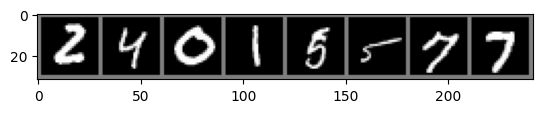

Labels: 2 4 0 1 5 5 7 7


In [6]:
# Iterate over the train_loader and display images
for images, labels in train_loader:
    # Show images
    imshow(torchvision.utils.make_grid(images))
    # Print corresponding labels
    print('Labels:', ' '.join(f'{labels[j].item()}' for j in range(len(labels))))
    break  # Break after first batch to avoid showing too many images


# CNN Module

In [7]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer 1: Input 1 channel (grayscale), output 16 feature filters, 3x3 Convolutional kernel (Square sliding window)
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        # Convolutional layer 2: Input 16 channels, output 32 channels, 3x3 kernel
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Max-pooling layer: 2x2 window
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layer 1: input 32 * 7 * 7 (flattened from the feature maps) and 128 outputs
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        # Fully connected layer 2: output 10 classes (0-9 digits) - 128 neurons in each hidden layer
        self.fc2 = nn.Linear(128, 10)
        # Activation function to add NON-LINEARITY into the code
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass through conv1, then ReLU, then pooling
        x = self.pool(self.relu(self.conv1(x)))
        # Pass through conv2, then ReLU, then pooling
        x = self.pool(self.relu(self.conv2(x)))
        # Flatten the feature maps
        x = x.view(-1, 32 * 7 * 7)
        # Pass through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

# Defining Loss, Weight and Biases

In [8]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss() # loss function to calculate the losses
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer to update the weights and biases


# Training the Model

In [7]:
# Train the model
num_epochs = 4
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')


Epoch [1/4], Loss: 0.1127
Epoch [2/4], Loss: 0.0440
Epoch [3/4], Loss: 0.0313
Epoch [4/4], Loss: 0.0227


In [ ]:
images.shape

# Evaluvating the mode

Test Accuracy: 99.03%


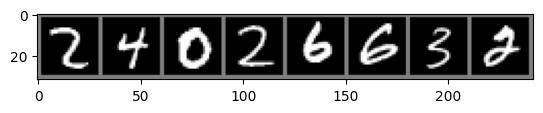

Predicted:  2 4 0 2 6 6 3 2


In [10]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Visualize predictions on a few test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Predict
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show images and predictions
imshow(torchvision.utils.make_grid(images.cpu()[:8]))
print('Predicted: ', ' '.join(f'{predicted[j].item()}' for j in range(8)))

In [ ]:
for i in _:
    print(i)

# Saving the Model

In [9]:
torch.save(model.state_dict(), 'mnist_model.pth')

# Loading the saved model

In [9]:
model = SimpleCNN()

model.load_state_dict(torch.load('mnist_model.pth'))
model.to(device)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

# Getting the wrong predictions - GPT

# Incorrect data

Test Accuracy: 99.03%


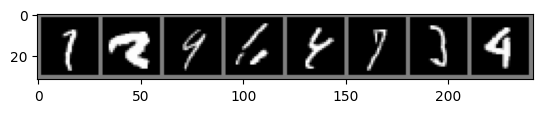

True Labels      : 1 2 9 6 4 7 3 4
Predicted Labels : 7 7 4 1 8 9 1 9


In [19]:
# Evaluate the model
model.eval()
correct, total = 0, 0
in_images, in_labels, in_predictions = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store incorrect predictions using boolean indexing
        incorrect = predicted != labels
        in_images.extend(images[incorrect].cpu())
        in_labels.extend(labels[incorrect].cpu())
        in_predictions.extend(predicted[incorrect].cpu())

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Function to show incorrect predictions
def show_incorrect_predictions(in_images, in_labels, in_predictions, batch_size=8):
    imshow(torchvision.utils.make_grid(in_images[:batch_size], nrow=batch_size))
    print('True Labels      :', ' '.join(f'{label.item()}' for label in in_labels[:batch_size]))
    print('Predicted Labels :', ' '.join(f'{pred.item()}' for pred in in_predictions[:batch_size]))

# Show incorrect images
show_incorrect_predictions(in_images, in_labels, in_predictions)

# Printing all wrong

Test Accuracy: 99.03%


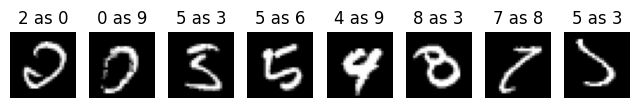

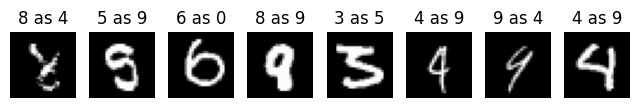

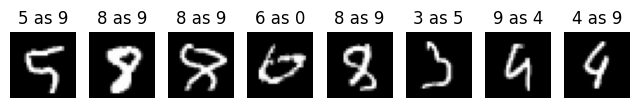

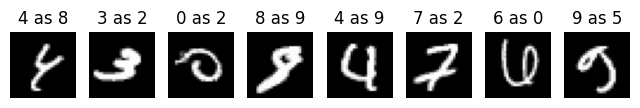

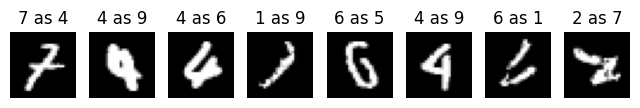

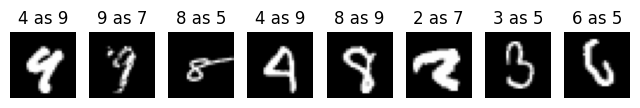

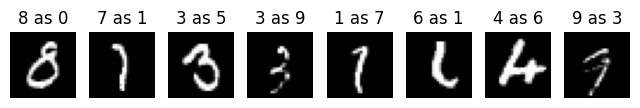

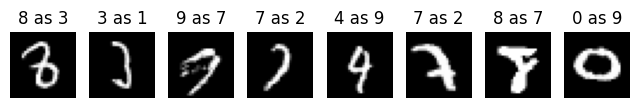

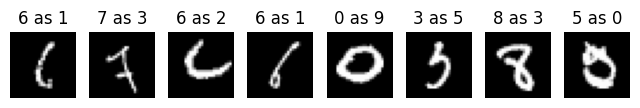

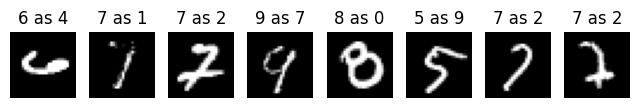

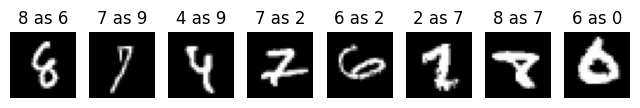

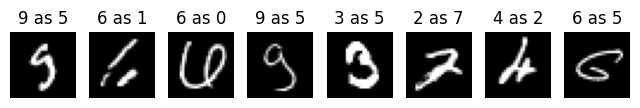

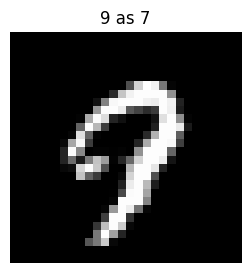

In [17]:
# Evaluate the model and store incorrect predictions
model.eval()
correct, total = 0, 0
incorrect_images, incorrect_labels, incorrect_predictions = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Store incorrect predictions using boolean indexing
        incorrect = predicted != labels
        incorrect_images.extend(images[incorrect].cpu())
        incorrect_labels.extend(labels[incorrect].cpu())
        incorrect_predictions.extend(predicted[incorrect].cpu())

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Function to show incorrect predictions in a grid
def show_incorrect_predictions(images, labels, predictions, batch_size=8):
    for start_idx in range(0, len(images), batch_size):
        num_images = min(batch_size, len(images) - start_idx)
        fig, axes = plt.subplots(1, num_images, figsize=(8, 3))
        axes = [axes] if num_images == 1 else axes  # Ensure axes is iterable

        for i, ax in enumerate(axes):
            img = images[start_idx + i] / 2 + 0.5  # Unnormalize
            ax.imshow(np.transpose(img.numpy(), (1, 2, 0)), cmap='gray')
            ax.set_title(f'{labels[start_idx + i]} as {predictions[start_idx + i]}')
            ax.axis('off')

        plt.show()

# Show incorrect images in batches
show_incorrect_predictions(incorrect_images, incorrect_labels, incorrect_predictions)


In [14]:
print(len(incorrect_images))

97


# Custom Image prediction

In [11]:
from PIL import Image

def load_image(image_path):
    # Open the image
    image = Image.open(image_path).convert('L')  # Convert image to grayscale

    # Define the transform: Resize, convert to tensor, and normalize
    transform = transforms.Compose([
        transforms.Resize((28, 28)),  # Resize to 28x28 pixels (like MNIST)
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] (same as MNIST normalization)
    ])

    # Apply the transform to the image
    image = transform(image)
    image = image.unsqueeze(0)  # Add a batch dimension (1, 1, 28, 28)

    return image

# Function to predict on a custom image
def predict_custom_image(image_path):
    # Load and preprocess the image
    image = load_image(image_path)
    
    # Move the image to the device (GPU or CPU)
    image = image.to(device)

    # Make sure the model is in evaluation mode
    model.eval()

    with torch.no_grad():  # No need to compute gradients for inference
        output = model(image)  # Forward pass through the model
        _, predicted_label = torch.max(output, 1)  # Get the index with the highest score (predicted label)

    return predicted_label.item()

# Test the function with a custom image
image_path = '2.jpeg'  # Replace with the path to your image
predicted_label = predict_custom_image(image_path)
print(f'The predicted label for the image is: {predicted_label}')

The predicted label for the image is: 2
